In [1]:
!pip list | grep data

astropy-iers-data                 0.2024.9.2.0.33.23
datashader                        0.16.3
importlib-metadata                7.0.1
stack-data                        0.2.0
tzdata                            2023.3
unicodedata2                      15.1.0


## Introducción

Vamos a trabajar con un dataset famoso llamado **adult** tomado de UCI: https://archive.ics.uci.edu/ml/datasets/Adult . Son datos obtenidos del censo de Estados Unidos de 1994 y la tarea consiste en predecir si una persona gana más de 50.000 dólares al año o no. Por lo tanto, cada fila es una persona y las columnas son las características de la misma.

In [6]:
import pandas as pd
import numpy as np

In [7]:
# https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/ <- parcialmente basado en

df = pd.read_csv("https://github.com/palasatenea66/DATASETS/raw/main/adult_train.csv")
df.columns
df.head()

f1                 f2      f3          f4  f5                   f6  \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   f7              f8      f9      f10   f11  f12  f13  \
0        Adm-clerical   Not-in-family   White     Male  2174    0   40   
1     Exec-managerial         Husband   White     Male     0    0   13   
2   Handlers-cleaners   Not-in-family   White     Male     0    0   40   
3   Handlers-cleaners         Husband   Black     Male     0    0   40   
4      Prof-specialty            Wife   Black   Female     0    0   40   

              f14   label  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

In [8]:
# asignar nombres correctos de columnas
# https://github.com/stn0106/ML-Datasets/blob/master/adult-train.csv
# https://github.com/stn0106/ML-Datasets/blob/master/adult.names

df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target']

In [5]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Las variables categóricas son: **workclass**, **education**, **marital-status**, **occupation**, **relationship**, **race**, **sex**, **native-country**.

- Las variables numéricas son: **age**, **fnlwgt**, **education-num**, **capital-gain**, **capital-loss**, **hours-per-week**

## Análisis exploratorio

Para este EDA vamos a usar un paquete que nos genera numerosos gráficos automáticamente y, por lo tanto, nos permite una aproximación rápida a los datos con los que vamos a trabajar.

####AVISO: actualmente hay incompatibilidad entre la versión actual de Numpy con la de Sweetviz. Hay varias opciones como instalar la versión anterior de Numpy con la cual Sweetviz andaba -> no recomendable xq seguro aparece alguna otra cosa que deja de andar.
####Por ahora, no usaremos Sweetviz sino Ydata-profiling.

In [ ]:
# https://stackoverflow.com/questions/76501976/sweetviz-installed-but-wont-run-module-numpy-has-no-attribute-warnings
# https://github.com/fbdesignpro/sweetviz/issues/174#issuecomment-2230913307

#!pip uninstall -y sweetviz
#!pip install sweetviz


In [ ]:
# sweetviz es un paquete de análisis exploratorio automático, una alternativa también es pandas-profiling
# https://zephyrnet.com/es/conozca-sus-datos-mucho-m%C3%A1s-r%C3%A1pido-con-la-nueva-biblioteca-de-python-de-sweetviz/
# https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde
# https://colab.research.google.com/drive/1-md6YEwcVGWVnQWTBirQSYQYgdNoeSWg?usp=sharing#scrollTo=6hs4aRB7Eupr

#import sweetviz as sv
#analyzing the dataset
#advert_report = sv.analyze(df)

El siguiente comando escribe un *html* con una serie de gráficos. Además, intenta abrir una pestaña nueva. Si ésto no sucede entonces deberán ejecutar manualmente el archivo. Para eso, si están en Google Colab deberán descargar el archivo y luego darle doble clic al archivo en su computadora.

In [ ]:
#advert_report.show_html('df.html')  # para verlo en el navegador

Report df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# 'bajamos' la salida de sweetviz para visualizarla en la pc localmente

#from google.colab import files
#files.download('df.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


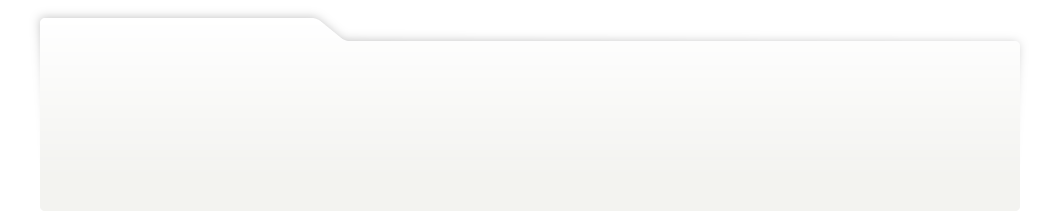
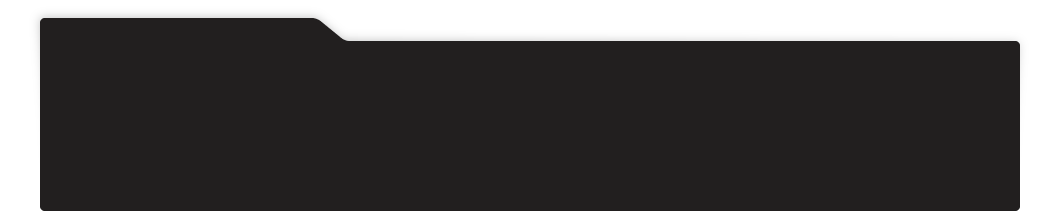
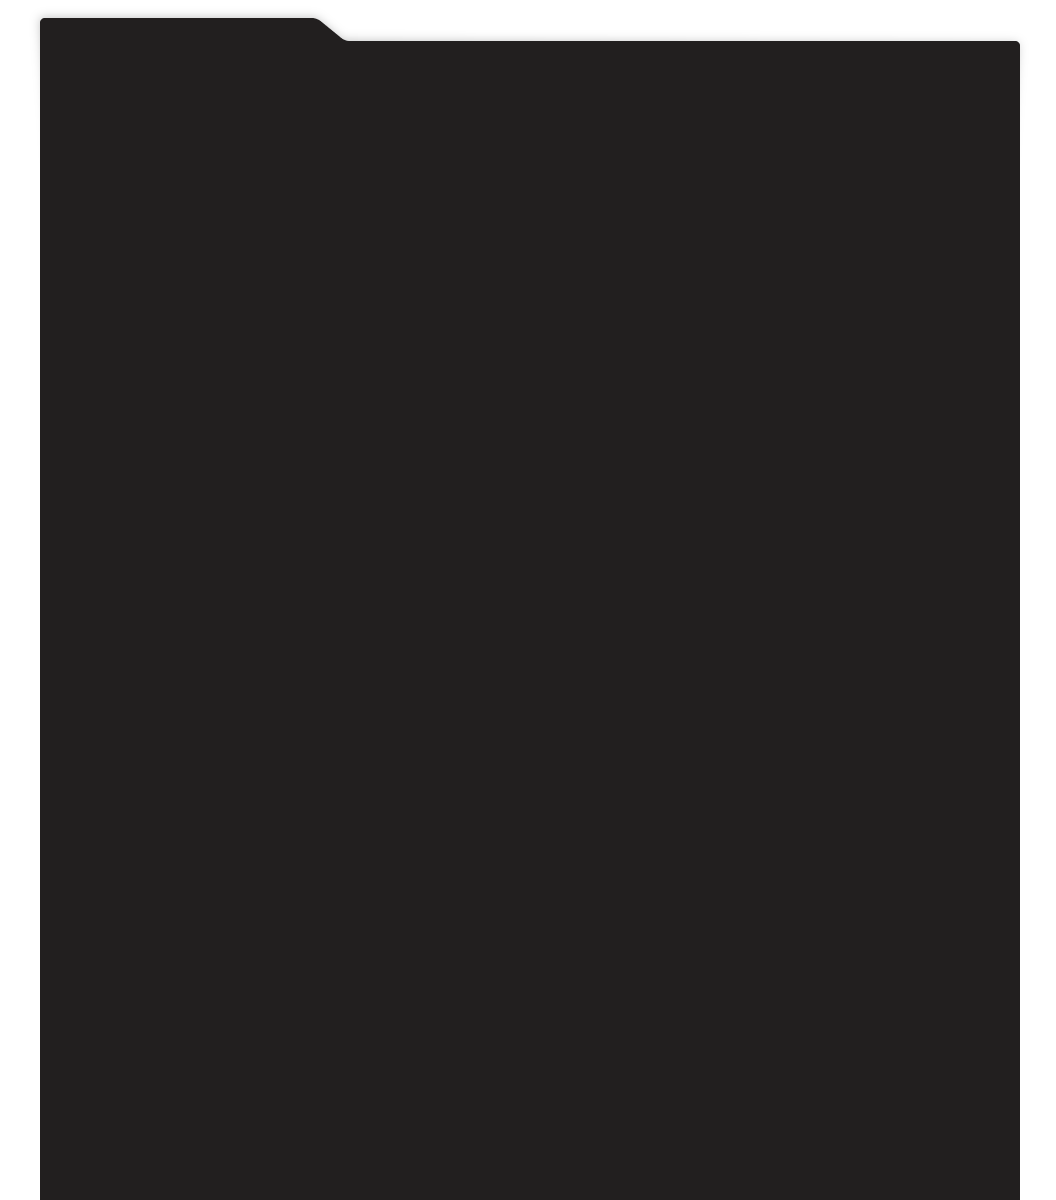
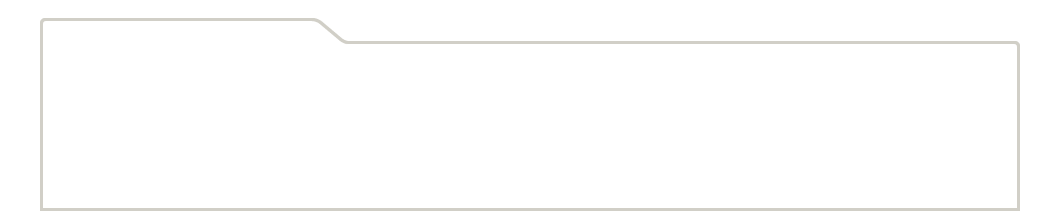
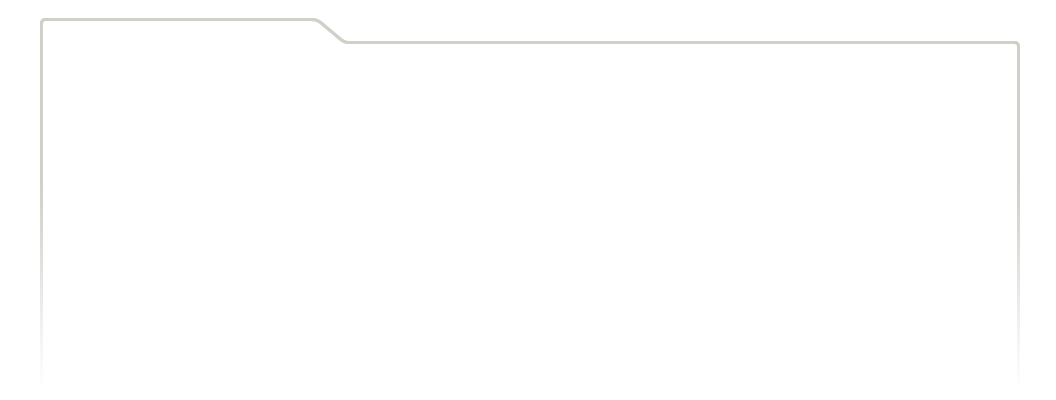
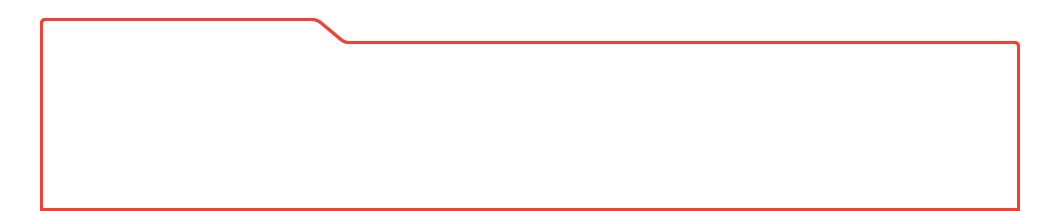
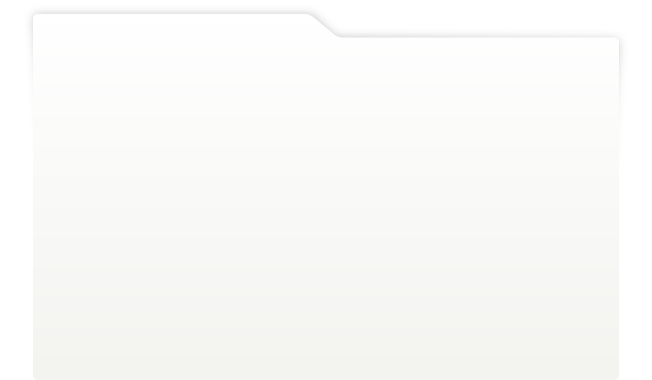
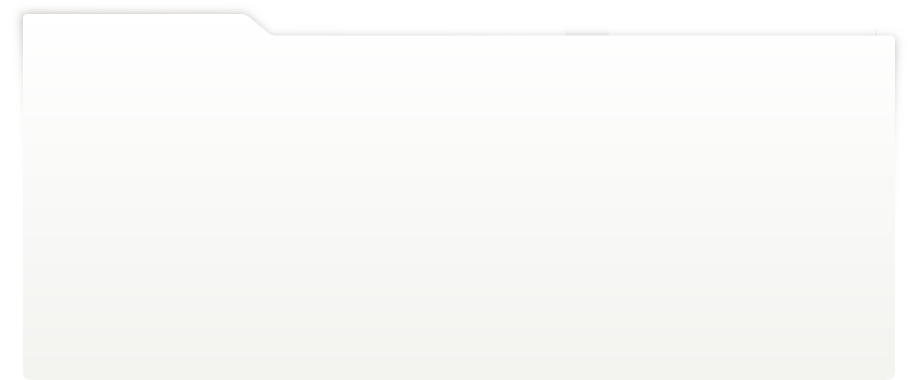
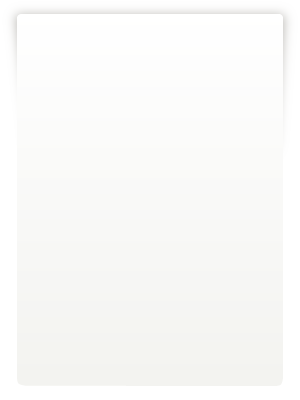
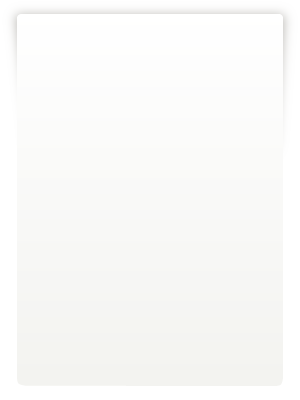
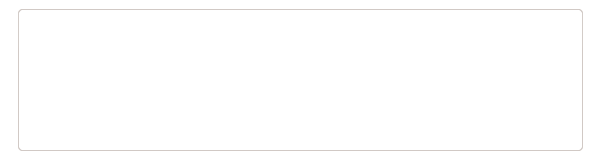
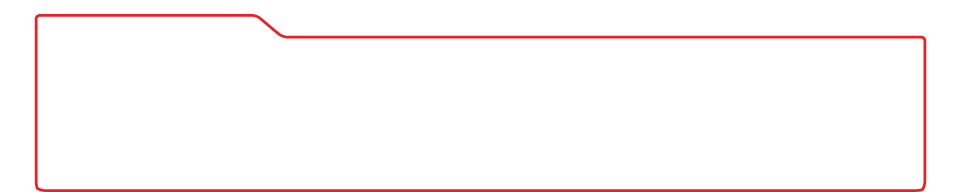
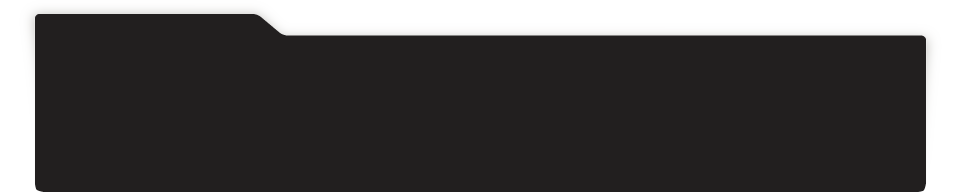
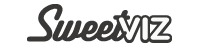
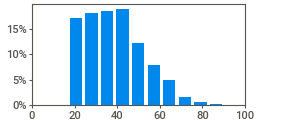
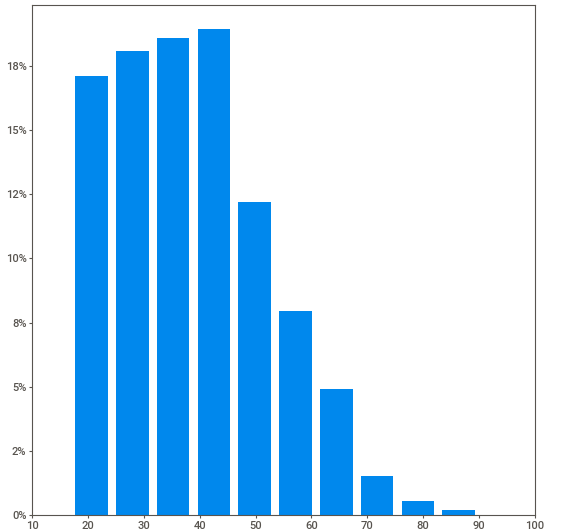
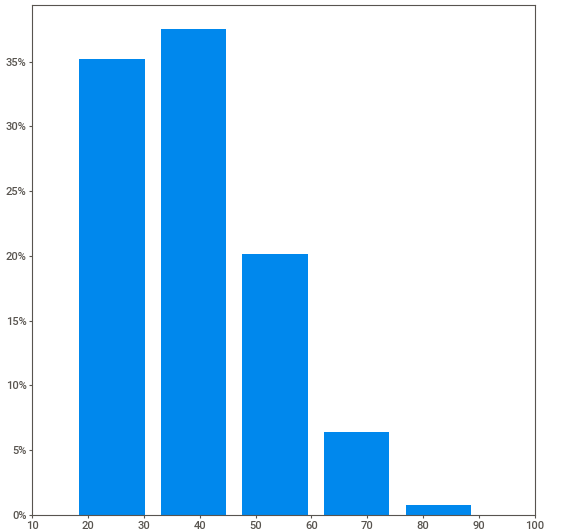
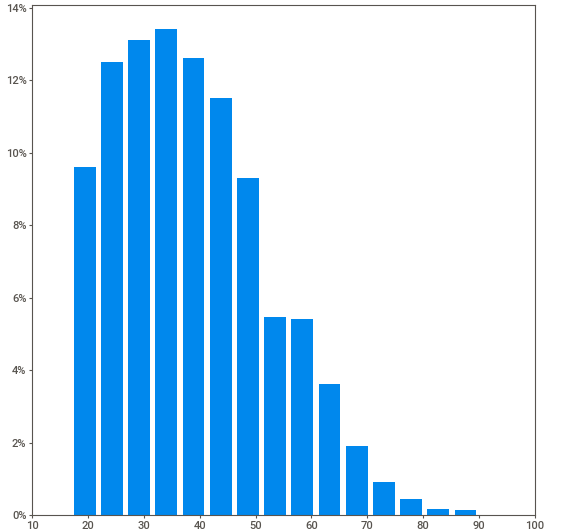
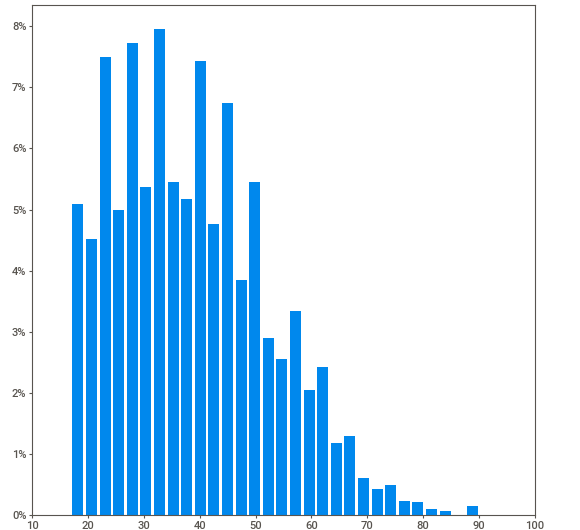
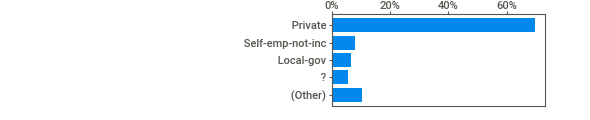
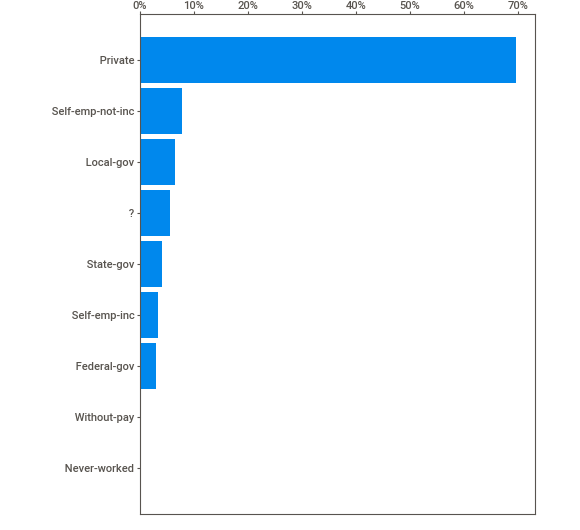
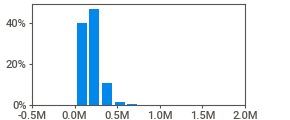
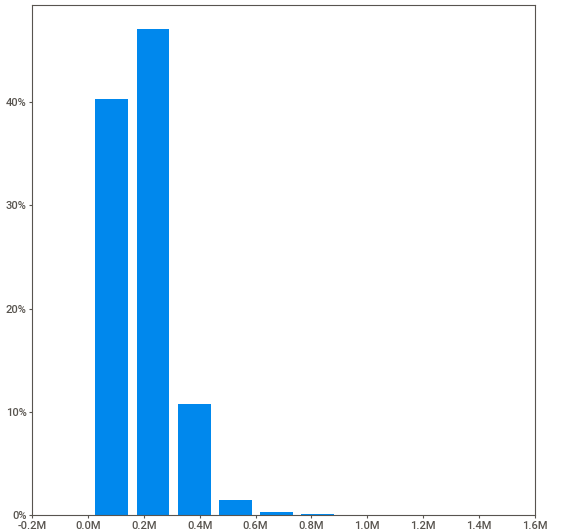
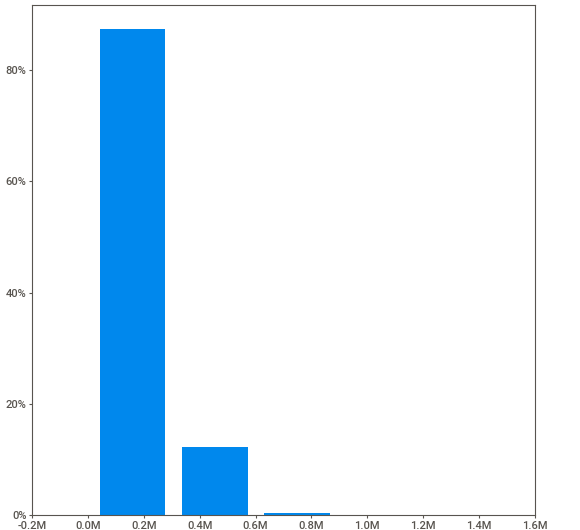
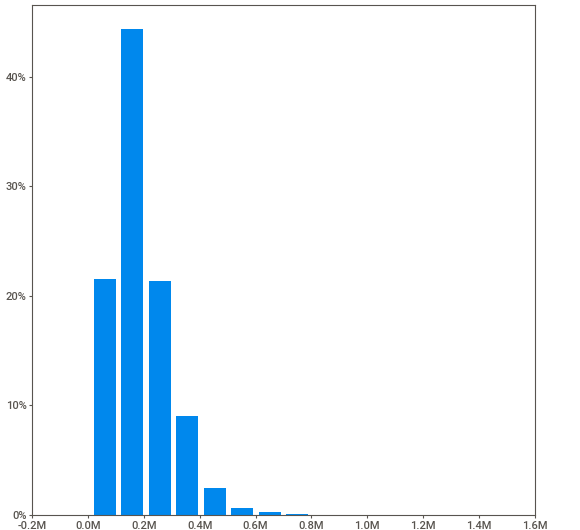
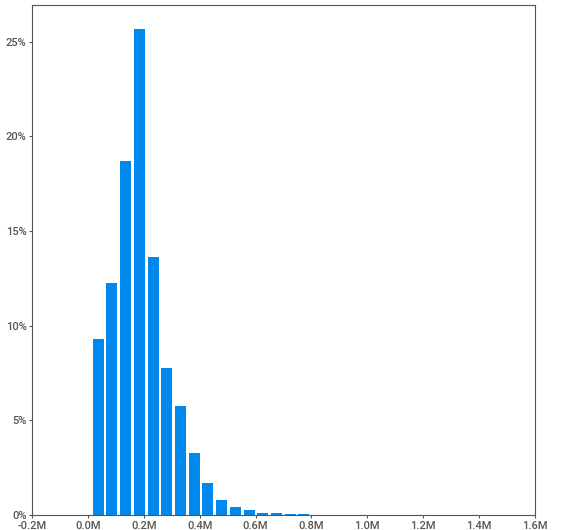
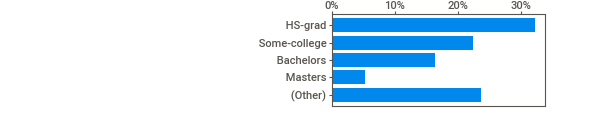
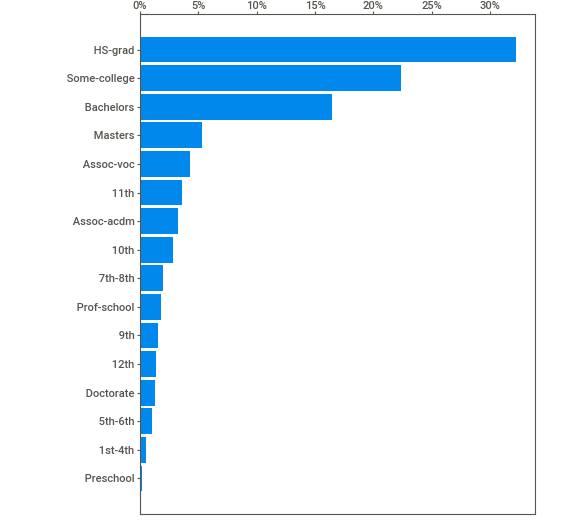
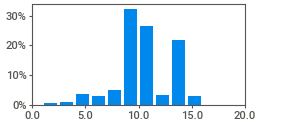
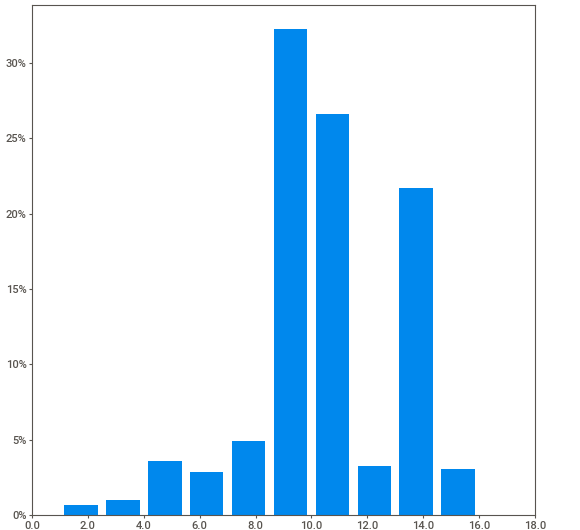
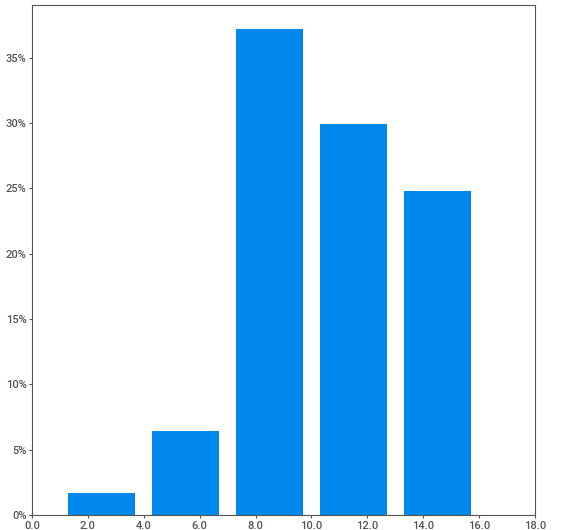
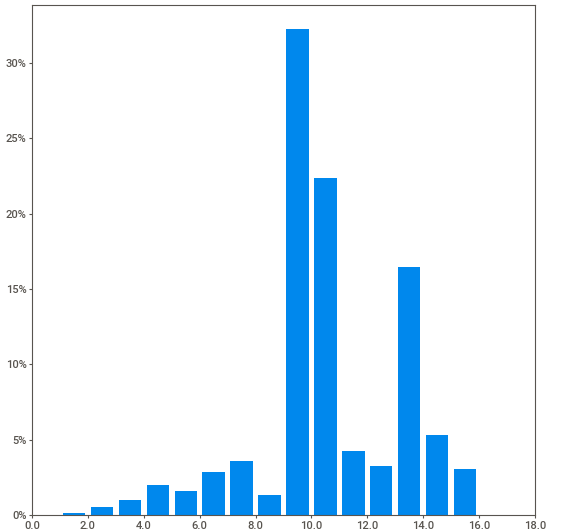
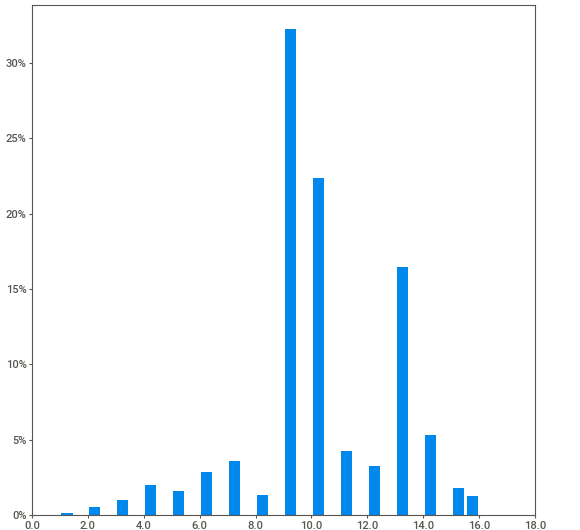
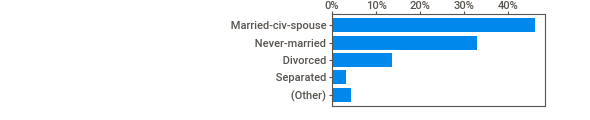
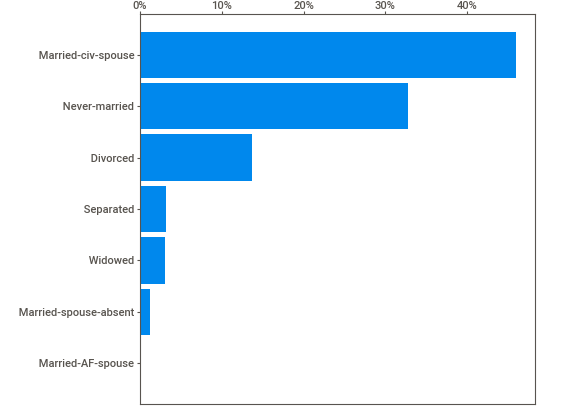
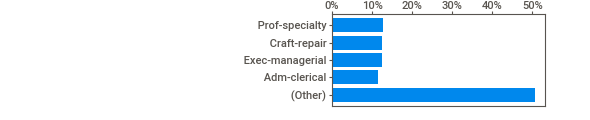
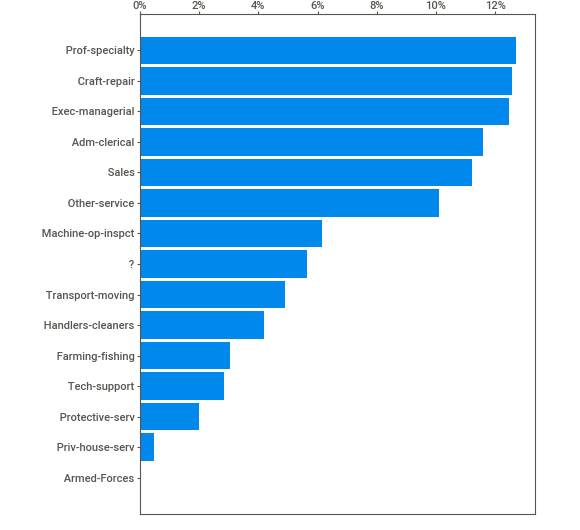
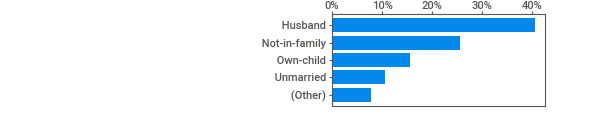
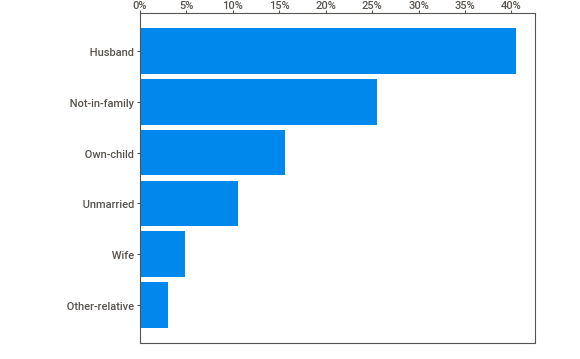
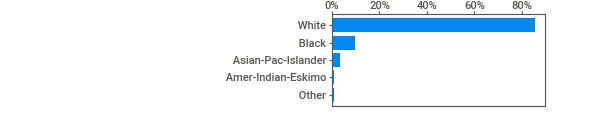
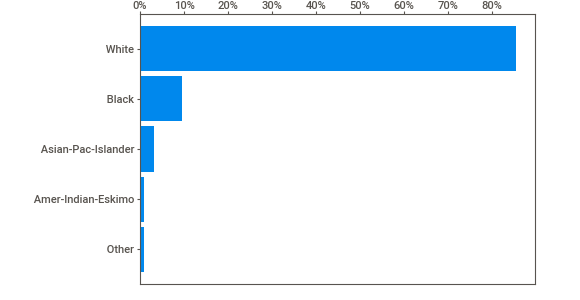
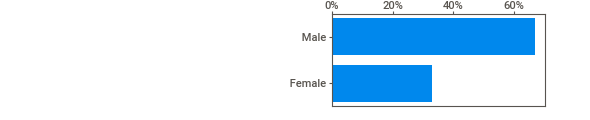
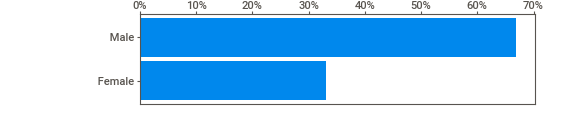
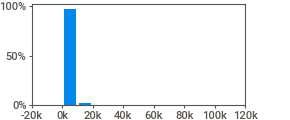
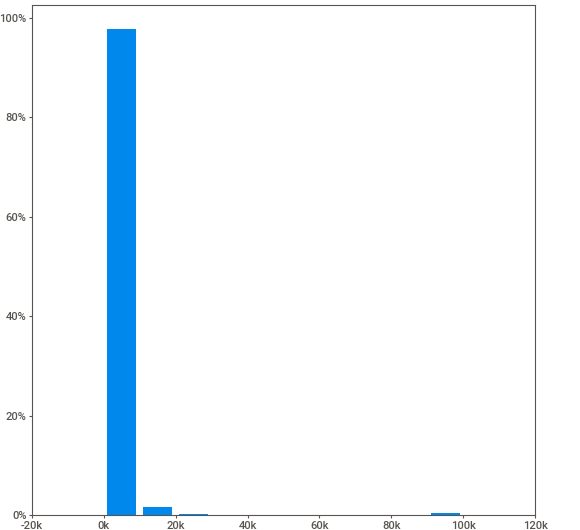
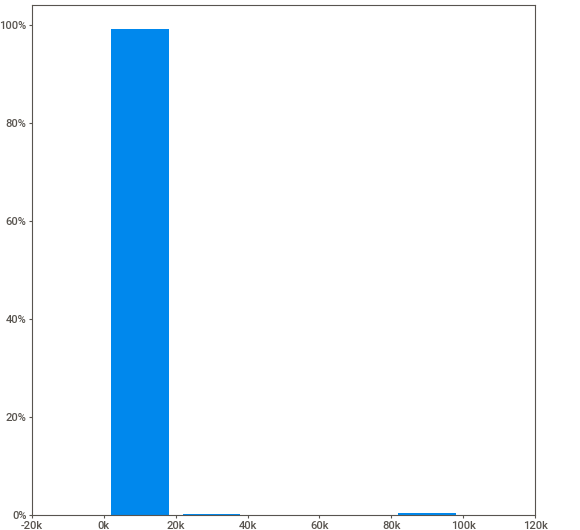
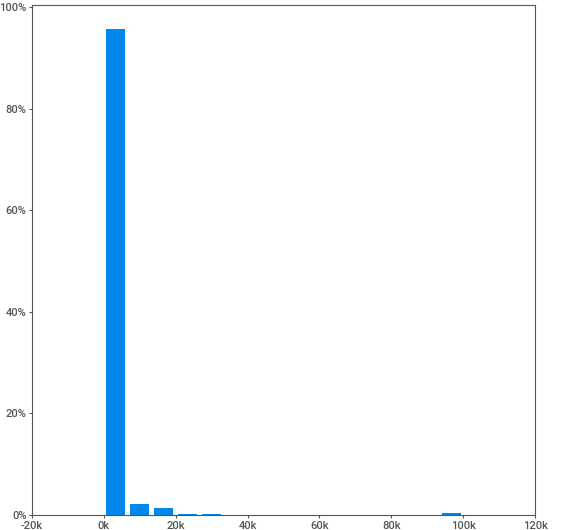
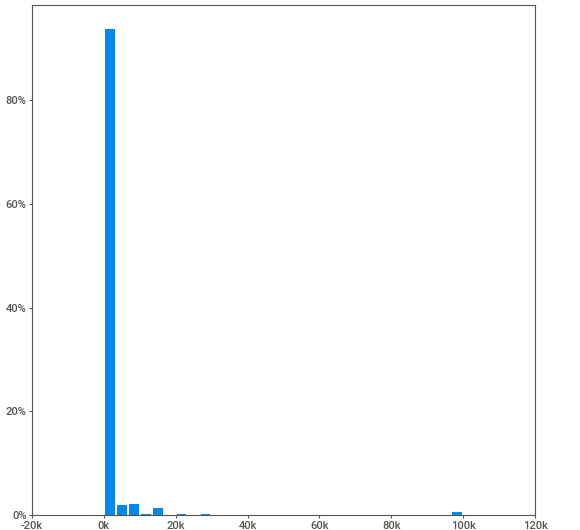
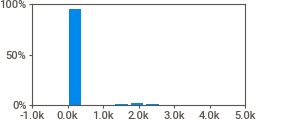
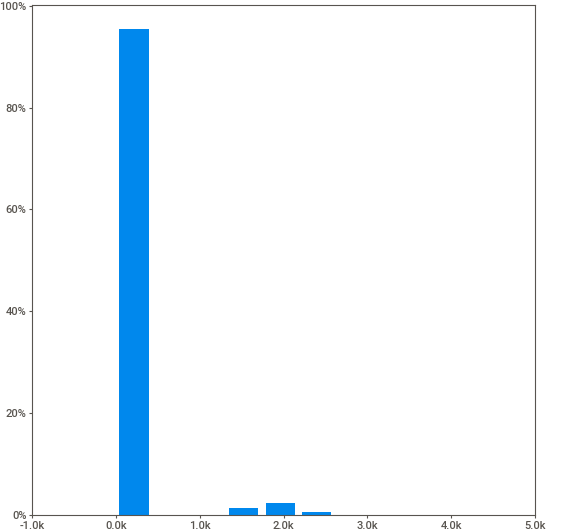
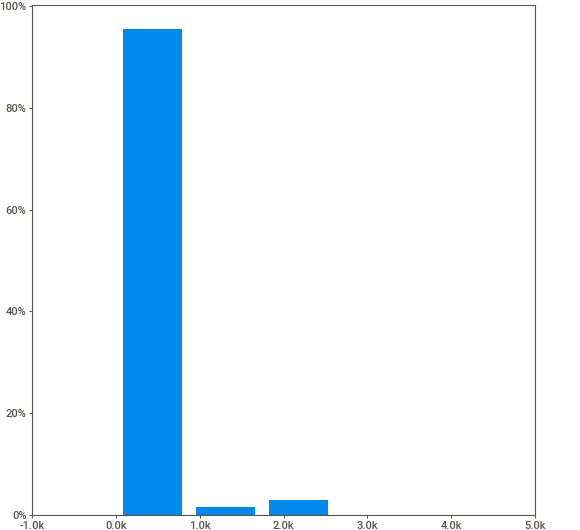
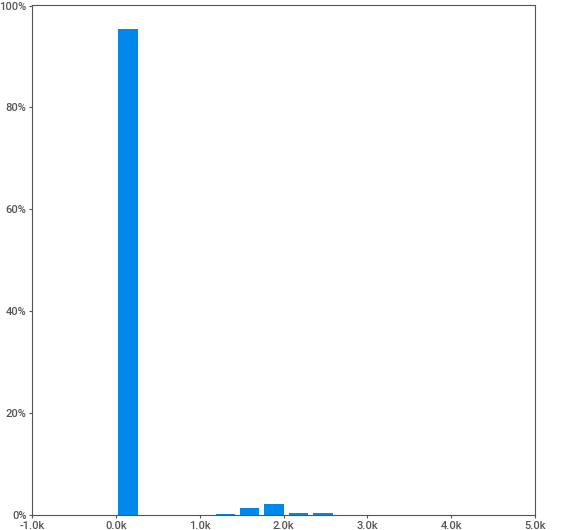
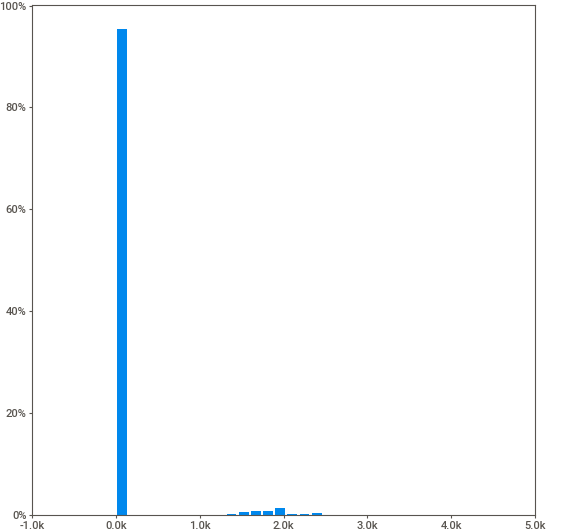
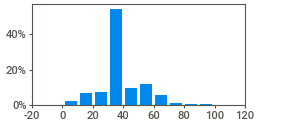
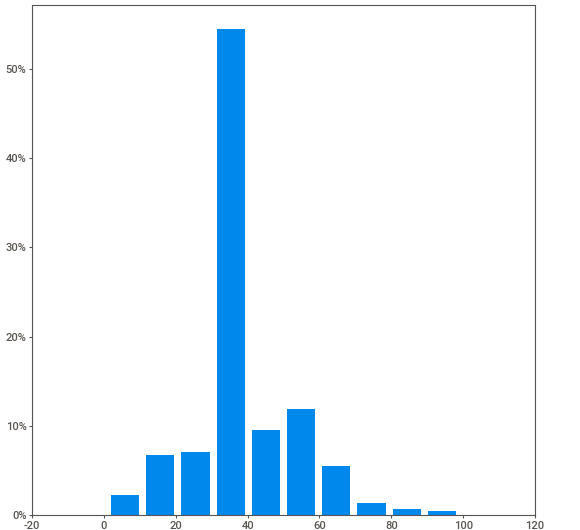
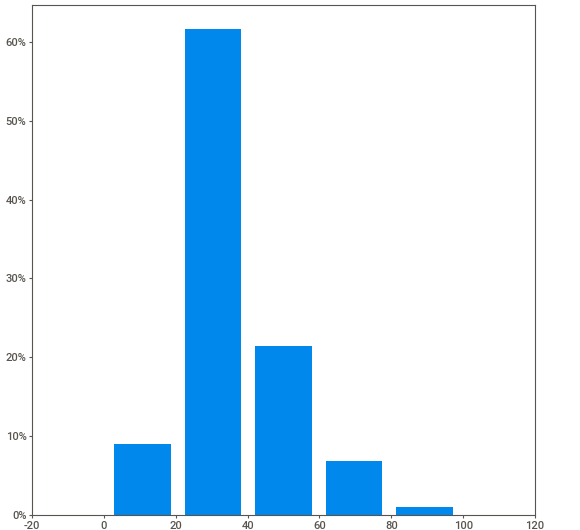
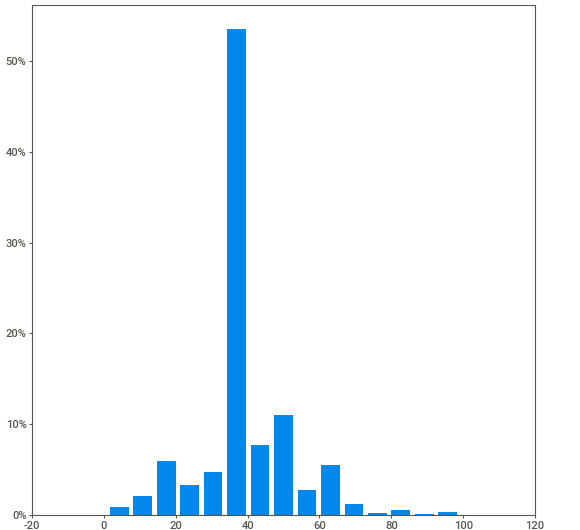
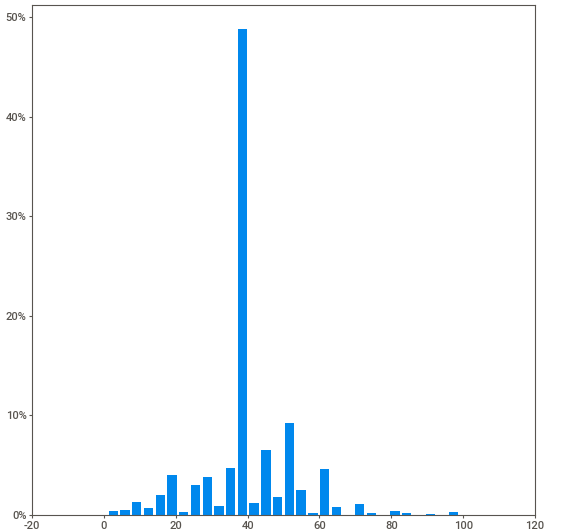
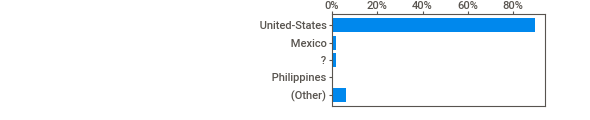
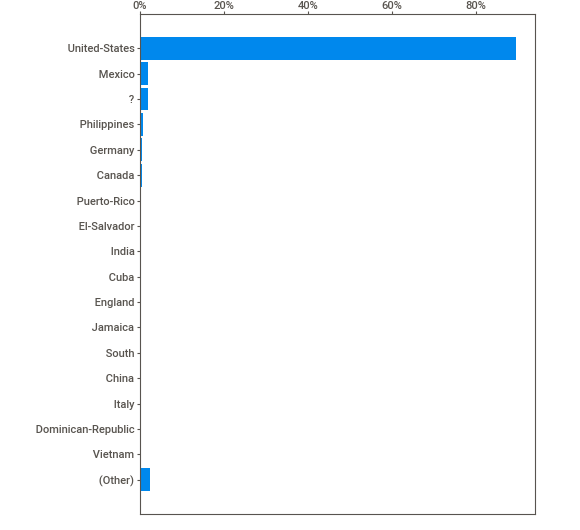
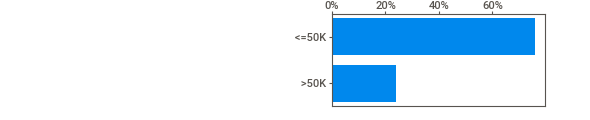
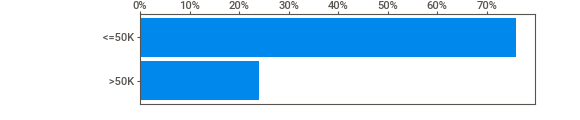
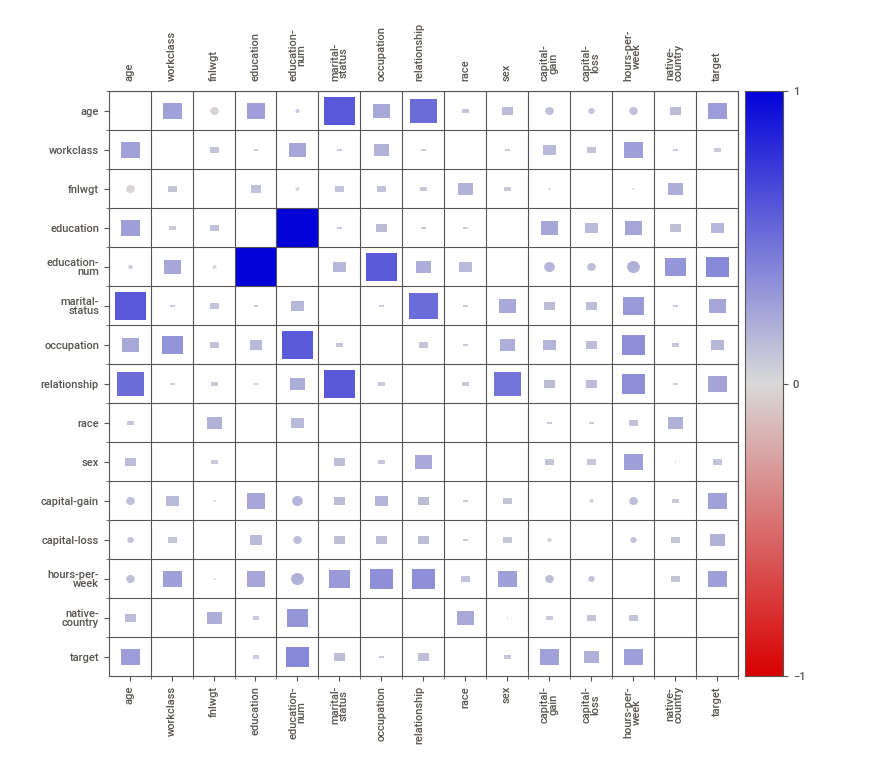
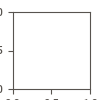

In [ ]:
#advert_report.show_notebook(w="100%")    # para verlo directamente en el notebook

### Observaciones

Del reporte de *sweetviz* interesan destacar las siguientes cuestiones:


1- En **workclass** los nulos se identifican con **?**.

2- **target** no está parejamente distribuido, con 76% para la categoría **<=50K** y 24% para **>50K**.

3- **capital-gain** y **capital-loss** son variables continuas pero mayoritariamente son 0 (91.7% y 95.3% respectivamente).

Cliqueando en ASSOCIATIONS (arriba al medio) podemos ver métricas de correlación entre variables, allí se observa que:

4- **education-num**, **capital-gain**, **capital-loss**, **hours-per-week**, **age** son las variables más correlacionadas con **target**.

*Ahora EDA automatizado con Ydata-Profiling*

In [ ]:
# opción pandas-profilling, ahora llamada 'ydata-profiling'
# https://www.analyticslane.com/2019/06/12/automatizar-el-analisis-de-datos-con-pandas-profiling/
# https://www.datasource.ai/uploads/d8bd6d716a55e75759045076654f51b3.html

!pip install 'ydata-profiling[notebook]'


In [2]:
!pip list | grep profiling   # solamente queremos ver las bibliotecas que tienen 'profiling' en el nombre

ydata-profiling                   4.16.1


In [ ]:
import ydata_profiling as prof
profile = prof.ProfileReport(df, title="Profiling Report")
profile.to_file("output.html")
profile

In [13]:
profile

## Preparamos train y test

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
# Reemplaza todas las ocurrencias de ' ?' en el DataFrame por NaN (valor nulo)
df.replace(' ?', np.nan, inplace=True)

In [12]:
X_train = df.drop("target",axis=1)
y_train = df["target"]

In [13]:
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: target, Length: 32561, dtype: object

In [14]:
X_train

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  
0         Male          2174             0              40   United-States  
1         Male             0             0              13   United-States  
2         Male             0             0              40   United-States  
3         Male             0             0              40   United-States  
4       Female             0             0              40            Cuba  
...        ...           ...           ...             ...             ...  
32556   Female             0             0              38   United-States  
32557     Male             0             0              40   United-States  
32558   Female             0             0              40   United-States  
32559     Male             0             0              20   United-States  
32560   Female         15024             0              40   United-States  

[32561 rows x 14 columns]

In [16]:
pd.unique(y_train)

array([' <=50K', ' >50K'], dtype=object)

In [17]:
# LabelEncoder se usa para codificar las labels como números
l_encoder = LabelEncoder()

In [ ]:
# TRANSFORMACIÓN DE LA VARIABLE OBJETIVO A 0 Y 1
y_train = l_encoder.fit_transform(y_train)
pd.unique(y_train)

array([0, 1])

In [20]:
test = pd.read_csv("https://github.com/palasatenea66/DATASETS/raw/main/adult_test.csv")

In [21]:
test.columns=df.columns
test

age      workclass  fnlwgt      education  education-num  \
0       25        Private  226802           11th              7   
1       38        Private   89814        HS-grad              9   
2       28      Local-gov  336951     Assoc-acdm             12   
3       44        Private  160323   Some-college             10   
4       18              ?  103497   Some-college             10   
...    ...            ...     ...            ...            ...   
16276   39        Private  215419      Bachelors             13   
16277   64              ?  321403        HS-grad              9   
16278   38        Private  374983      Bachelors             13   
16279   44        Private   83891      Bachelors             13   
16280   35   Self-emp-inc  182148      Bachelors             13   

            marital-status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing          Husband   
2       Married-civ-spouse     Protective-serv          Husband   
3       Married-civ-spouse   Machine-op-inspct          Husband   
4            Never-married                   ?        Own-child   
...                    ...                 ...              ...   
16276             Divorced      Prof-specialty    Not-in-family   
16277              Widowed                   ?   Other-relative   
16278   Married-civ-spouse      Prof-specialty          Husband   
16279             Divorced        Adm-clerical        Own-child   
16280   Married-civ-spouse     Exec-managerial          Husband   

                      race      sex  capital-gain  capital-loss  \
0                    Black     Male             0             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male          7688             0   
4                    White   Female             0             0   
...                    ...      ...           ...           ...   
16276                White   Female             0             0   
16277                Black     Male             0             0   
16278                White     Male             0             0   
16279   Asian-Pac-Islander     Male          5455             0   
16280                White     Male             0             0   

       hours-per-week  native-country   target  
0                  40   United-States   <=50K.  
1                  50   United-States   <=50K.  
2                  40   United-States    >50K.  
3                  40   United-States    >50K.  
4                  30   United-States   <=50K.  
...               ...             ...      ...  
16276              36   United-States   <=50K.  
16277              40   United-States   <=50K.  
16278              50   United-States   <=50K.  
16279              40   United-States   <=50K.  
16280              60   United-States    >50K.  

[16281 rows x 15 columns]

In [22]:
test.replace(' ?', np.nan, inplace=True)
test

age      workclass  fnlwgt      education  education-num  \
0       25        Private  226802           11th              7   
1       38        Private   89814        HS-grad              9   
2       28      Local-gov  336951     Assoc-acdm             12   
3       44        Private  160323   Some-college             10   
4       18            NaN  103497   Some-college             10   
...    ...            ...     ...            ...            ...   
16276   39        Private  215419      Bachelors             13   
16277   64            NaN  321403        HS-grad              9   
16278   38        Private  374983      Bachelors             13   
16279   44        Private   83891      Bachelors             13   
16280   35   Self-emp-inc  182148      Bachelors             13   

            marital-status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing          Husband   
2       Married-civ-spouse     Protective-serv          Husband   
3       Married-civ-spouse   Machine-op-inspct          Husband   
4            Never-married                 NaN        Own-child   
...                    ...                 ...              ...   
16276             Divorced      Prof-specialty    Not-in-family   
16277              Widowed                 NaN   Other-relative   
16278   Married-civ-spouse      Prof-specialty          Husband   
16279             Divorced        Adm-clerical        Own-child   
16280   Married-civ-spouse     Exec-managerial          Husband   

                      race      sex  capital-gain  capital-loss  \
0                    Black     Male             0             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male          7688             0   
4                    White   Female             0             0   
...                    ...      ...           ...           ...   
16276                White   Female             0             0   
16277                Black     Male             0             0   
16278                White     Male             0             0   
16279   Asian-Pac-Islander     Male          5455             0   
16280                White     Male             0             0   

       hours-per-week  native-country   target  
0                  40   United-States   <=50K.  
1                  50   United-States   <=50K.  
2                  40   United-States    >50K.  
3                  40   United-States    >50K.  
4                  30   United-States   <=50K.  
...               ...             ...      ...  
16276              36   United-States   <=50K.  
16277              40   United-States   <=50K.  
16278              50   United-States   <=50K.  
16279              40   United-States   <=50K.  
16280              60   United-States    >50K.  

[16281 rows x 15 columns]

In [23]:
X_test = test.drop("target",axis=1)
y_test = test["target"]
y_test
# ojo que no son iguales a las del train

0         <=50K.
1         <=50K.
2          >50K.
3          >50K.
4         <=50K.
          ...   
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50K.
16280      >50K.
Name: target, Length: 16281, dtype: object

In [24]:
y_test.replace( " <=50K.", " <=50K", inplace=True)

In [25]:
y_test.replace(" >50K.", " >50K", inplace=True)

In [26]:
pd.unique(y_test)

array([' <=50K', ' >50K'], dtype=object)

In [31]:
# acá estamos traduciendo las etiquetas de las labels a números, con el mismo mapeo de antes (!!!!)
l_encoder = LabelEncoder()
y_test = l_encoder.fit_transform(y_test)
pd.unique(y_test)

array([0, 1])

In [33]:
# inverse_transform nos permite hacer el mapeo en el sentido opuesto, de número a label
l_encoder.inverse_transform(y_test)

array([0, 0, 1, ..., 0, 0, 1])

In [34]:
# Para chequear que el mapeo se hace correctamente podemos hacer lo siguiente:
np.array_equal(test["target"].values, l_encoder.inverse_transform(y_test))

False

In [35]:
# Check if y_train contains only integers:
if not np.issubdtype(y_train.dtype, np.integer):
    y_train = y_train.astype(int)